<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
파이썬 이해, 데이터 수집 및 정제, 데이터 시각화, 통계의 이해까지이며 내용으로는 Pandas활용, 시각화, 통계적 가설검정

Python
platform — 하부 플랫폼의 식별 데이터에 대한 액세스

In [ ]:
import platform

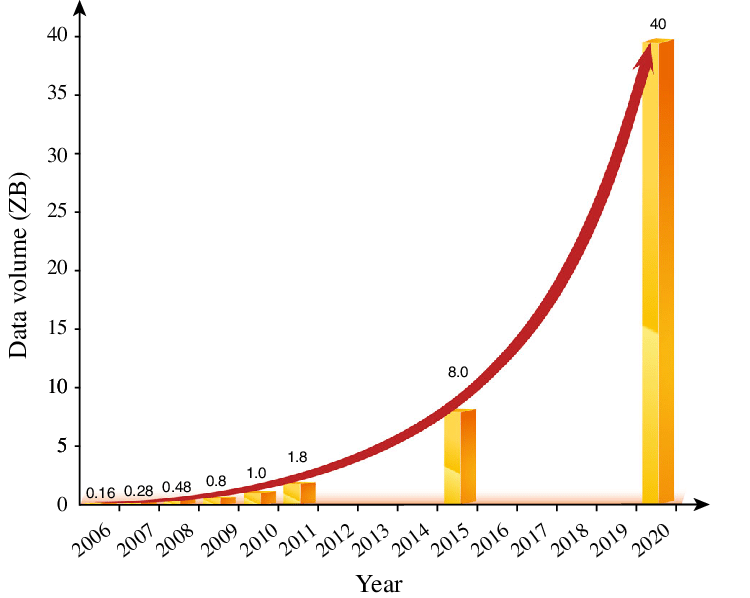

In [1]:
path = "./"

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv(path+"health.csv", encoding = "euc-kr")

In [ ]:
df.head()

In [ ]:
df = pd.read_excel(path+"grade.xlsx", sheet_name = "Sheet1")

In [ ]:
df.head()

In [ ]:
table = {"일자" : ['2019-01-01','2019-01-04','2019-01-07','2019-01-10','2019-01-13'],
  "가격" : [1000, 1500, 2000, 2500, 3000],
  "구매여부" : ['False', 'True', 'True', 'True', 'True'],
  "제품" : ['gum', 'snack', 'beverage', 'dongas', 'alchoal']}

In [ ]:
type(table)

In [ ]:
df = pd.DataFrame(table)

In [ ]:
df.head()

In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.to_csv(path+"제품명세.csv", encoding = "euc-kr")

In [ ]:
df.to_excel("제품명세.xlsx", encoding = "euc-kr", index = False)

In [4]:
df = pd.read_csv(path+"auto_mpg.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.mpg.dtypes

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

**데이터 선택**


In [ ]:
df["mpg"]

In [ ]:
df.mpg

In [ ]:
df[0:5]

In [ ]:
df[:]

**loc : 이름을 이용한 선택**

In [ ]:
df.loc[:, "mpg"]

In [ ]:
df.iloc[0:10, 0]

In [ ]:
df[df.mpg > 18]

In [ ]:
df.query("mpg > 18")

**데이터 선택_연습**

In [21]:
import numpy as np

In [22]:
from numpy.random import randn

In [23]:
np.random.seed(1234) # 랜덤으로 생성된 데이터 고정

In [25]:
# 랜덤 함수를 이용해 생성된 데이터를 데이터프레임 구조로 df 데이터 생성
df = pd.DataFrame(randn(10,2), columns=["A", "B"]) 

In [ ]:
df.info()

In [ ]:
df["A"]  # A열 선택(Series형태)

In [ ]:
df[["A"]] # A열 선택(데이터프레임형태)

In [ ]:
df.loc[0:7,['A']]

In [ ]:
df.loc[:, ['A']]

In [ ]:
df.loc[3:8]

In [ ]:
df.loc[3:3]

In [ ]:
df.iloc[0:7, [0]] # 열과 행을 Index번호

In [ ]:
df.iloc[:, [0]]

In [ ]:
df.iloc[3:8]

In [ ]:
df.iloc[3:3]

In [ ]:
df.query("A > 0.5")

In [ ]:
df.query("A > B")

In [ ]:
df[df.A > df.B] 

In [ ]:
# 복수조건을 이용한 데이터 선택
# AND 조건
df.query("A > 0.5 & B <0.0")

In [ ]:
# OR 조건
df.query("A > 0.5 | B < 0.0") 

**filter : 이름을 이용한 컬럼 선택**


**mask를 이용한 데이터 선택**

In [50]:
df = pd.read_csv("data_fil.csv")

In [ ]:
df

In [ ]:
# 컬럼명 직접 입력
df.filter(items = ['group1','value1'])

In [ ]:
# regex(regular expression) 이용. '1' 포함
df.filter(regex = '1', axis = 1)

In [ ]:
# regex 이용. '1'로 끝나는 컬럼
df.filter(regex = '1$', axis = 1)

In [ ]:
# 'a' 포함된 컬럼. reg='a'와 동일
df.filter(like = 'a', axis = 1)

In [ ]:
# 'A' 또는 'a' 포함된 컬럼([] 이용)
df.filter(regex = '[Aa]', axis = 1)

In [ ]:
# 조건 입력 및 mask 적용
df.mask(df.value1 > 12)

In [ ]:
df

In [ ]:
df.mask(df.abc == 'a')

In [ ]:
# 조건 입력 및 mask 적용, 값 변경
df.mask(df.value1 > 12, 999)

**연결(concatenate)**


In [ ]:
df1 = pd.read_csv("data_con1.csv")
df1
df2 = pd.read_csv("data_con2.csv")
df2.index = [4, 5, 6, 7]
df2
df3 = pd.read_csv("data_con3.csv")
df3.index = [8, 9, 10, 11]
df3

In [ ]:
df2

In [63]:
result = pd.concat([df1, df2, df3])

In [ ]:
result

In [67]:
df1 = pd.read_csv("data_con1.csv")
df2 = pd.read_csv("data_con2.csv")
#df2.index = [4, 5, 6, 7]
df3 = pd.read_csv("data_con3.csv")
#df3.index = [8, 9, 10, 11]

In [70]:
result = pd.concat([df1, df2, df3], axis=1)

In [76]:
result

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [83]:
result = pd.concat([df1, df2, df3], axis = 1, ignore_index=True)

In [84]:
result.rename(columns={0:"A",1:"B",2:"C",3:"D",4:"E",5:"F",6:"G",7:"H", 8:"I",9:"J",10:"K",11:"L"}, inplace=True)

In [85]:
result

,A,B,C,D,E,F,G,H,I,J,K,L
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


**병합(merge)/결합(join)**  Page 143